In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [43]:
import os 
os.listdir()
data_health=pd.read_csv('ProjectTycho_Level1_v1.0.0.csv', na_values= '0')

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\3289523672.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_health=pd.read_csv('ProjectTycho_Level1_v1.0.0.csv', na_values= '0')


In [44]:
data_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759467 entries, 0 to 759466
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   epi_week              759467 non-null  int64  
 1   state abr             759467 non-null  object 
 2   state                 759467 non-null  object 
 3   loc_type              759467 non-null  object 
 4   disease               759467 non-null  object 
 5   cases                 473236 non-null  object 
 6   incidence_per_100000  472299 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 40.6+ MB


In [45]:
from epiweeks import Week, Year
data_health['epi_week']=data_health['epi_week'].astype('str')
data_health['week_ending'] = data_health['epi_week'].apply(lambda x: Week.fromstring(x).enddate())
data_health.head()

,epi_week,state abr,state,loc_type,disease,cases,incidence_per_100000,week_ending
0,196601,MN,MINNESOTA,STATE,HEPATITIS A,3.0,0.08,1966-01-08
1,196601,CO,COLORADO,STATE,HEPATITIS A,1.0,0.05,1966-01-08
2,196601,AZ,ARIZONA,STATE,HEPATITIS A,6.0,0.37,1966-01-08
3,196601,MT,MONTANA,STATE,HEPATITIS A,2.0,0.28,1966-01-08
4,196601,LA,LOUISIANA,STATE,HEPATITIS A,1.0,0.03,1966-01-08


In [46]:
data_health['week_ending']=pd.to_datetime(data_health['week_ending'])
data_health['year'] = data_health['week_ending'].dt.year

In [47]:
data_health['disease'].nunique()
data_health['disease'].unique()

array(['HEPATITIS A', 'MEASLES', 'MUMPS', 'PERTUSSIS', 'POLIO', 'RUBELLA',
       'SMALLPOX', 'DIPHTHERIA'], dtype=object)

In [48]:
polio=data_health[(data_health['disease']== 'POLIO')]
polio.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
polio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81531 entries, 414832 to 496362
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   state                 81531 non-null  object        
 1   disease               81531 non-null  object        
 2   cases                 46522 non-null  object        
 3   incidence_per_100000  46459 non-null  float64       
 4   week_ending           81531 non-null  datetime64[ns]
 5   year                  81531 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.4+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_3896\2413931012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polio.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)


In [49]:
df_group=polio_data.groupby(['year', 'state'], as_index=False).sum("incidence_per_")
df_pivot=df_group.pivot("state", "year", "incidence_per_100000")
df_pivot

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\3555779898.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot=df_group.pivot("state", "year", "incidence_per_100000")


year,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
state,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2.39,2.25,2.57,2.07,1.38,1.12,1.89,2.27,15.36,3.03,...,4.79,0.69,0.33,0.66,1.59,0.06,NaN,0.00,NaN,0.03
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.94,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARIZONA,2.61,2.07,7.36,2.53,1.62,3.72,25.68,4.83,2.06,4.40,...,4.96,0.70,0.63,0.42,0.20,NaN,0.12,0.00,NaN,0.06
ARKANSAS,0.52,0.20,4.25,0.86,0.73,0.67,0.73,1.52,2.98,18.37,...,10.98,2.32,1.49,1.38,0.25,NaN,0.10,0.05,0.05,0.05
CALIFORNIA,5.04,2.82,30.71,4.21,2.94,2.55,53.99,12.60,5.94,9.73,...,2.24,2.63,0.60,0.54,0.17,0.02,0.03,0.03,0.09,0.08
COLORADO,7.04,1.30,6.25,0.82,0.72,0.65,1.57,1.29,6.40,19.37,...,1.08,1.19,0.56,0.20,0.05,0.05,NaN,NaN,NaN,NaN
CONNECTICUT,4.53,1.32,4.57,69.95,1.92,4.49,0.84,24.54,0.84,6.70,...,2.39,1.44,0.20,0.08,0.07,0.08,NaN,NaN,NaN,NaN
DELAWARE,3.44,2.10,2.52,2.05,4.50,5.23,1.20,1.99,0.40,3.14,...,1.83,0.22,0.44,NaN,0.21,NaN,NaN,NaN,NaN,NaN
DISTRICT OF COLUMBIA,6.92,1.26,1.80,2.99,6.57,1.33,1.61,14.09,0.96,4.84,...,0.52,0.65,0.39,0.13,0.00,NaN,NaN,NaN,NaN,0.00


C:\Users\HP\AppData\Local\Temp\ipykernel_3896\3653017011.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("state", "year", "incidence_per_100000")


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

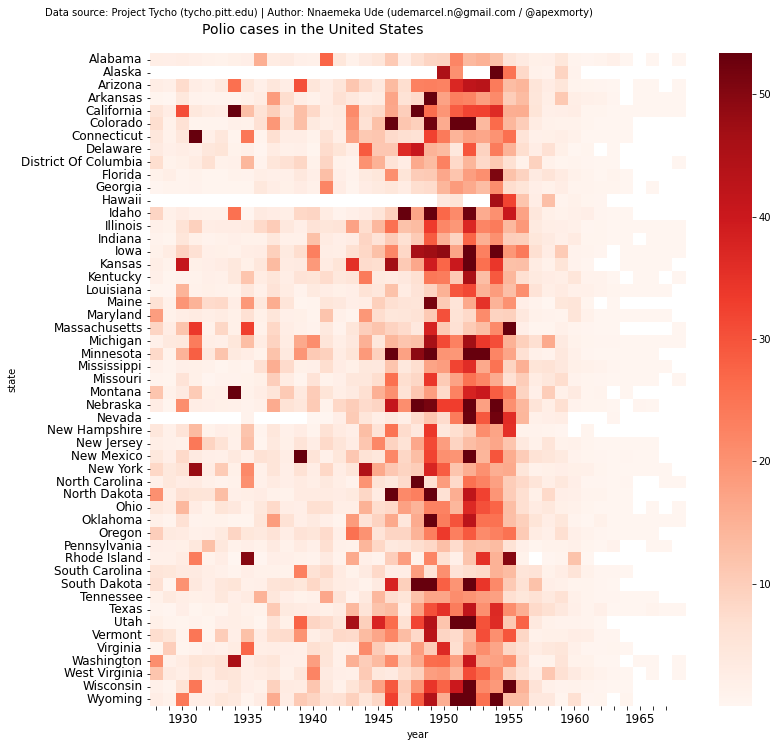

In [50]:
# Visualise for Polio

polio_data=polio[['state', 'incidence_per_100000','year']]
polio_data_disp = (
    polio_data

    # Update `state` names
    .assign(state=polio_data.state.str.title())

    # Need to group by `state` so as not to lose state distinction
    .groupby(["year", "state"], as_index=False).sum("incidence_per_100000")

    # Use `pivot` to set `state` to the index and `year` to columns
    .pivot("state", "year", "incidence_per_100000")
)

plt.figure(figsize=(12, 12))

sb.heatmap(polio_data_disp, cmap='Reds', robust=True,
    xticklabels=[
        x if x % 5 == 0 else ""
        for x in range(polio_data.year.min(), polio_data.year.max())
    ]
);


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Polio cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\3665550477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hepatitis.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\3665550477.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

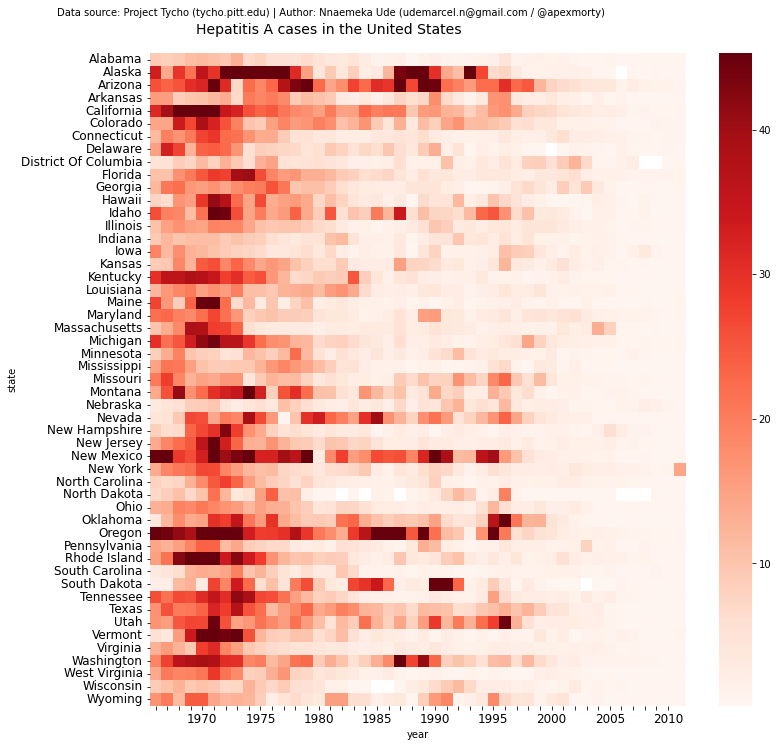

In [51]:
# Visualize for Hepatitis A
hepatitis=data_health[(data_health['disease']=='HEPATITIS A')]
hepatitis.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
hepatitis_data=hepatitis[['state', 'incidence_per_100000', 'year']]
hepatitis_data_disp= (
    hepatitis_data
    .assign(state=hepatitis_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(hepatitis_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(hepatitis_data.year.min(), hepatitis_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Hepatitis A cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1986175801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measles.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1986175801.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

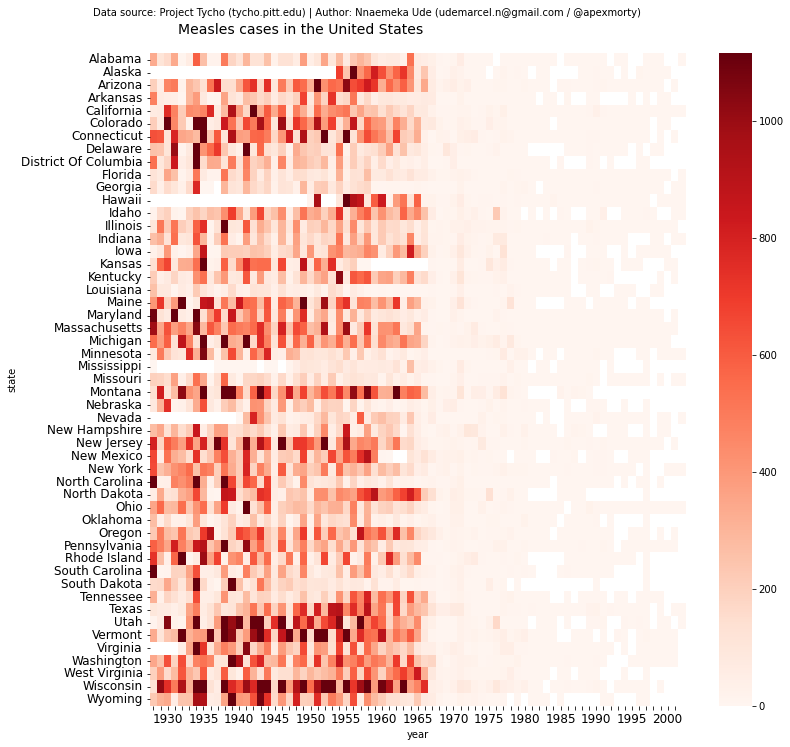

In [52]:
# Visualise for Measles

measles=data_health[(data_health['disease']=='MEASLES')]
measles.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
measles_data=measles[['state', 'incidence_per_100000', 'year']]
measles_data_disp= (
    measles_data
    .assign(state=measles_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(measles_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(measles_data.year.min(), measles_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Measles cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\4195154950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumps.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\4195154950.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

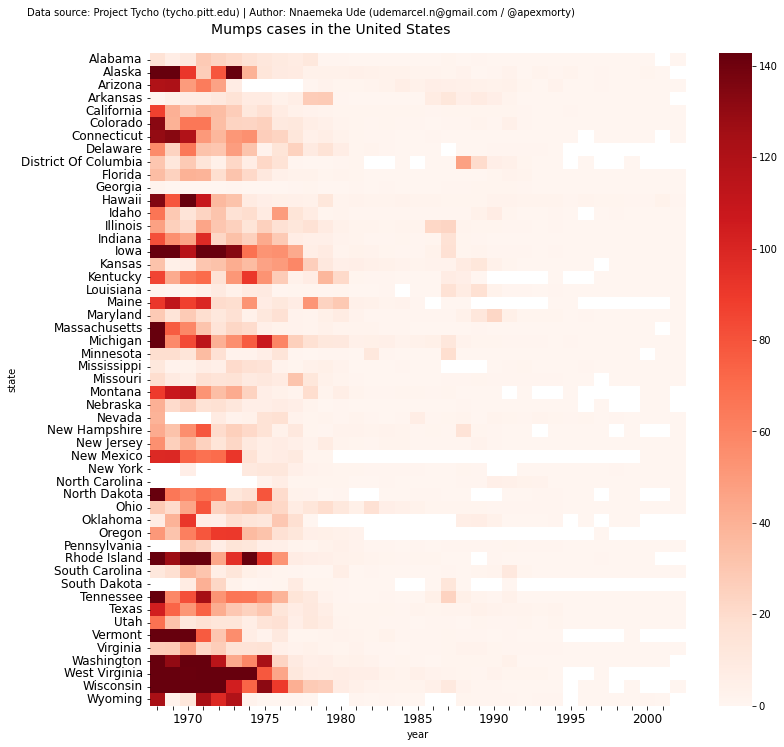

In [53]:
# check for the situation of Mumps 

mumps=data_health[(data_health['disease']=='MUMPS')]
mumps.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
mumps_data=mumps[['state', 'incidence_per_100000', 'year']]
mumps_data_disp= (
    mumps_data
    .assign(state=mumps_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(mumps_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(mumps_data.year.min(), mumps_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Mumps cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\138602136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pertussis.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\138602136.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

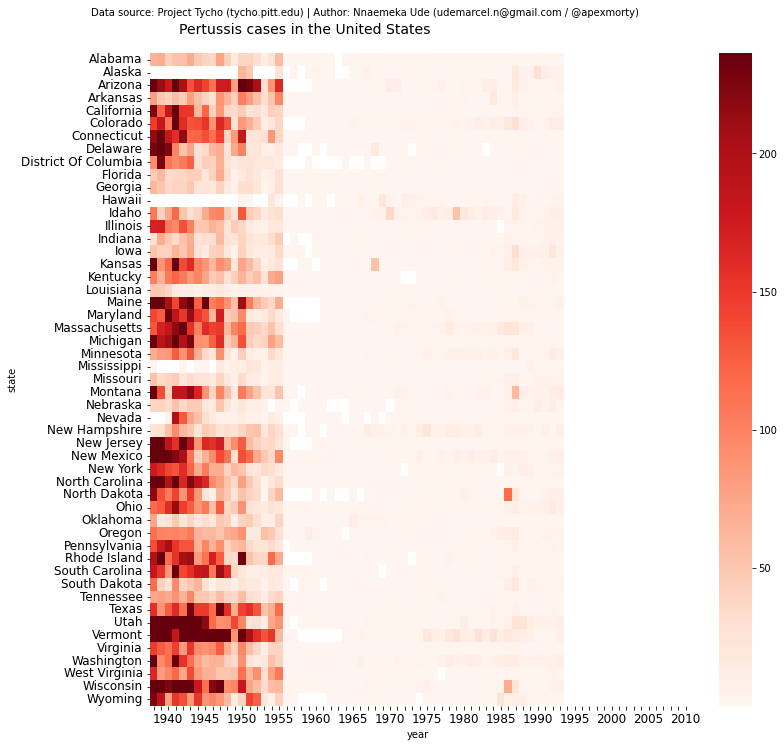

In [54]:
# Visualise for PERTUSSIS

pertussis=data_health[(data_health['disease']=='PERTUSSIS')]
pertussis.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
pertussis_data=pertussis[['state', 'incidence_per_100000', 'year']]
pertussis_data_disp= (
    pertussis_data
    .assign(state=pertussis_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(pertussis_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(pertussis_data.year.min(), pertussis_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Pertussis cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\4033929118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rubella.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\4033929118.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

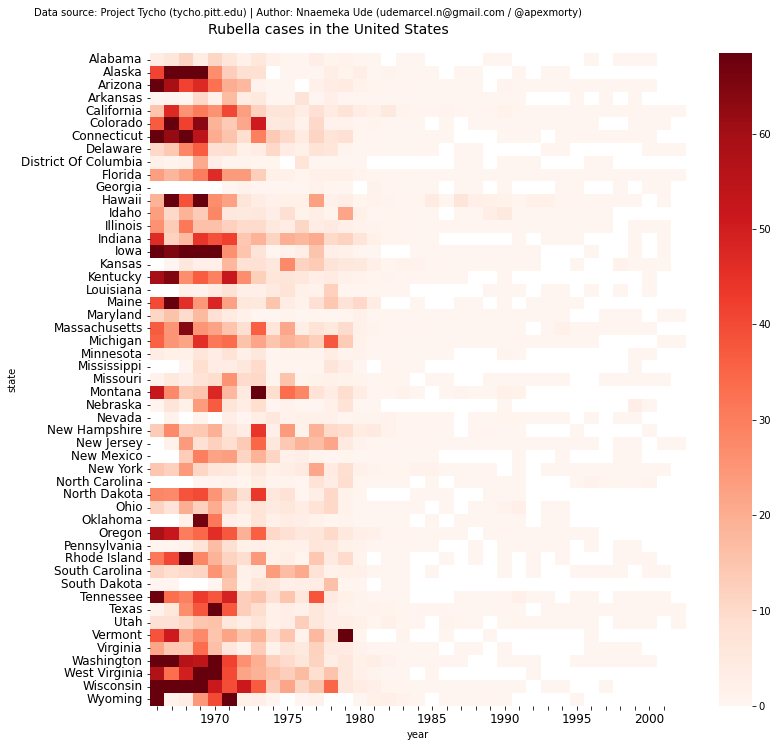

In [55]:
# Visualise for RUBELLA

rubella=data_health[(data_health['disease']=='RUBELLA')]
rubella.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
rubella_data=rubella[['state', 'incidence_per_100000', 'year']]
rubella_data_disp= (
    rubella_data
    .assign(state=rubella_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(rubella_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(rubella_data.year.min(), rubella_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Rubella cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1515818788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallpox.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1515818788.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

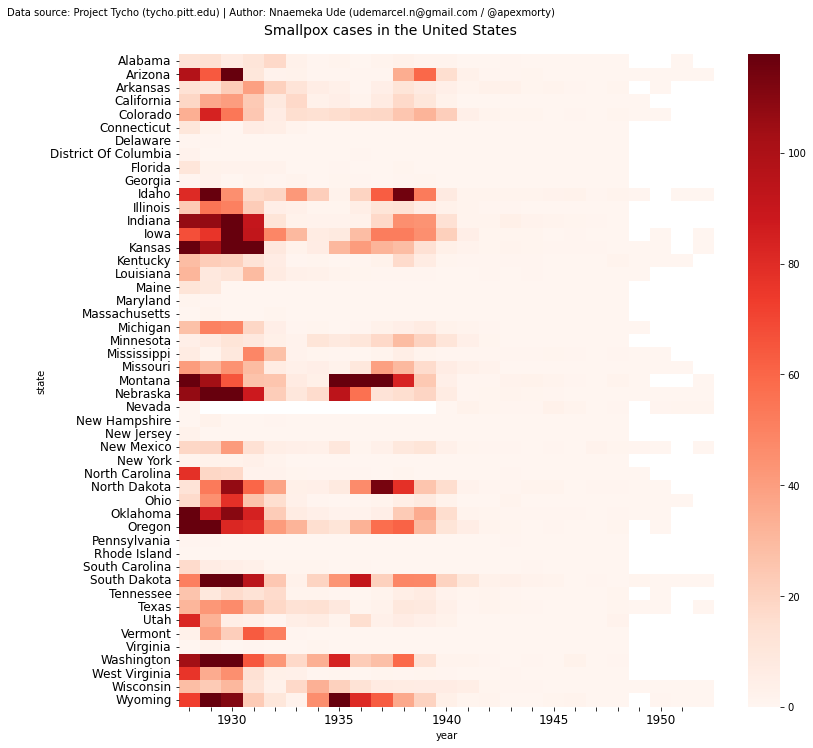

In [56]:
# Visualise for SMALLPOX

smallpox=data_health[(data_health['disease']=='SMALLPOX')]
smallpox.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
smallpox_data=smallpox[['state', 'incidence_per_100000', 'year']]
smallpox_data_disp= (
    smallpox_data
    .assign(state=smallpox_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(smallpox_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(smallpox_data.year.min(), smallpox_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -1.5, 'Smallpox cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1683141390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diphtheria.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1683141390.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('state', 'year', 'incidence_per_100000')


Text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) | Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)')

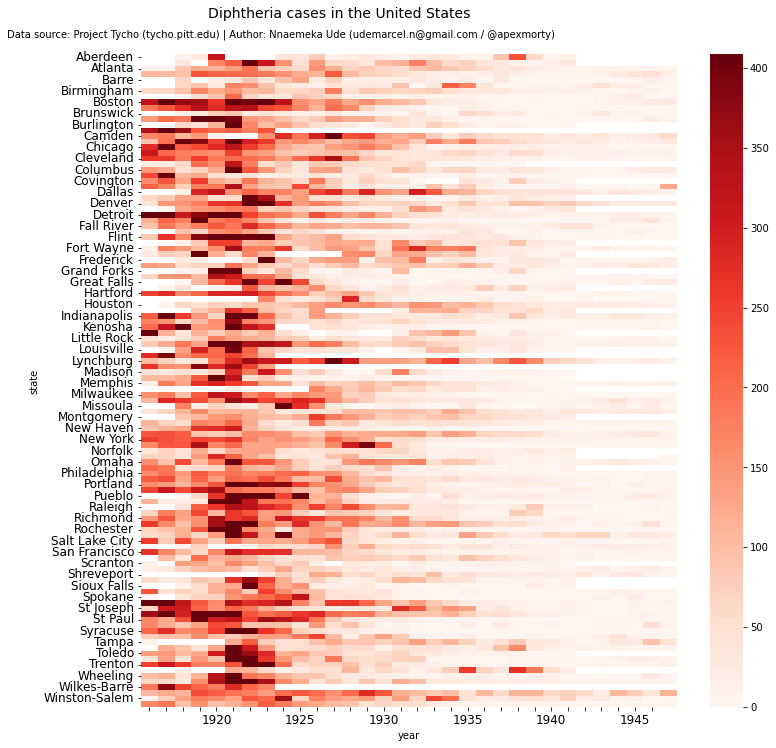

In [57]:
# Visualise for DIPHTHERIA

diphtheria=data_health[(data_health['disease']=='DIPHTHERIA')]
diphtheria.drop(['state abr', 'loc_type', 'epi_week'], axis=1, inplace=True)
diphtheria_data=diphtheria[['state', 'incidence_per_100000', 'year']]
diphtheria_data_disp= (
    diphtheria_data
    .assign(state=diphtheria_data.state.str.title())
    .groupby(['year', 'state'], as_index=False).sum('incidence_per_100000')
    .pivot('state', 'year', 'incidence_per_100000')
)

plt.figure(figsize=(12,12))

sb.heatmap(diphtheria_data_disp, cmap='Reds', robust= True, 
           xticklabels=[
               x if x % 5 == 0 else ""
               for x in range(diphtheria_data.year.min(), diphtheria_data.year.max())  
           ]
          )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(4, -6.5, 'Diphtheria cases in the United States', fontsize=14)
plt.text(-8, -3, 'Data source: Project Tycho (tycho.pitt.edu) '
         '| Author: Nnaemeka Ude (udemarcel.n@gmail.com / @apexmorty)',
         fontsize=10)

#### Visualise using a Line Chart

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\4043065725.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('year','state')


Text(1928.5, 163, 'Polio cases in the United States')

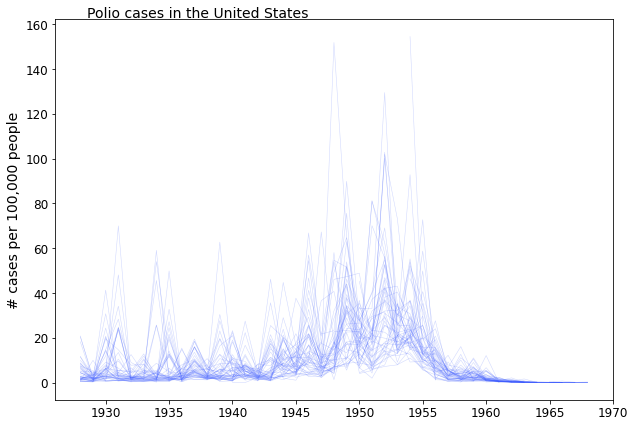

In [66]:
# Polio
polio_data_line= (
    polio_data
    .assign(state=polio_data.state.str.title())
    .groupby(['year','state'], as_index=False).sum()
    .pivot('year','state')
)
polio_data_line.plot(color='#3F5DFD', alpha=0.25, lw=0.5, legend=False,figsize=(10,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('# cases per 100,000 people', fontsize=14)
plt.text(1928.5, 163, 'Polio cases in the United States', fontsize=14)

### Inference

- From the heatmap and Line visualization we can see Polio was prevalent from the period 1947 till 1953; followed by a precipitious decline after, which could be the introdution of a vaccine to eradicate the disease.  

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\1731012880.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('year','state')


Text(1970, 500, 'Mumps cases in the United States')

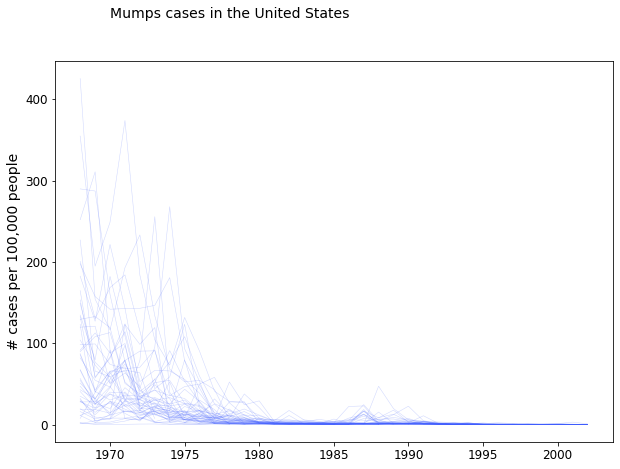

In [72]:
# Mumps
mumps_data_line= (
    mumps_data
    .assign(state=mumps_data.state.str.title())
    .groupby(['year','state'], as_index=False).sum()
    .pivot('year','state')
)
mumps_data_line.plot(color='#3F5DFD', alpha=0.25, lw=0.5, legend=False,figsize=(10,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('# cases per 100,000 people', fontsize=14)
plt.text(1970, 500, 'Mumps cases in the United States', fontsize=14)

Mumps had more incident count than polio and was prevalent in the 70s', decline infers a vaccine was introduced in around same period - probably 1977

C:\Users\HP\AppData\Local\Temp\ipykernel_3896\2770359233.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot('year','state')


Text(1928, 1200, 'Measles cases in the United States')

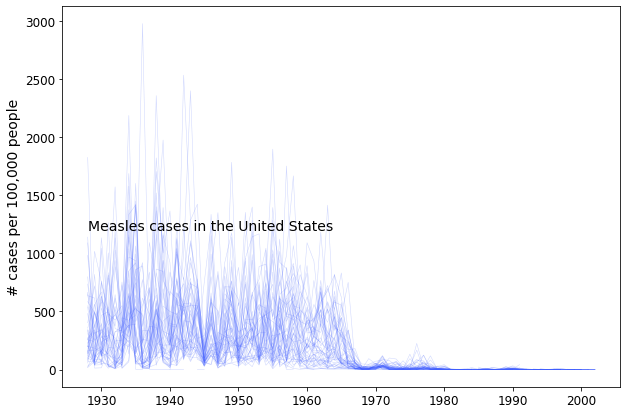

In [79]:
# Measles
measles_data_line= (
    measles_data
    .assign(state=measles_data.state.str.title())
    .groupby(['year','state'], as_index=False).sum()
    .pivot('year','state')
)
measles_data_line.plot(color='#3F5DFD', alpha=0.25, lw=0.5, legend=False,figsize=(10,7))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('# cases per 100,000 people', fontsize=14)
plt.text(1928, 1200, 'Measles cases in the United States', fontsize=14)